In [1]:
import random
import numpy as np
from imutils import paths
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam,SGD
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
import cv2
import sys
from keras.models import load_model
import os
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend.


In [2]:
from Video import Video

In [3]:
video = Video(path='save/')
trainlist=video.generate_file_list(p='train')
vallist = video.generate_file_list(p='val')

[INFO] loading images...
[INFO] loading images...


In [4]:
testlist = video.generate_file_list(p='test')

[INFO] loading images...


In [5]:
model=load_model('video_weights/weights-improvement-08-0.68.hdf5')

In [ ]:
pred={}
labels=os.listdir('save/')
for i,label in enumerate(labels):
    data,classes = video.load_data(label,'test')
    result=model.predict(data)
    result=np.argmax(result,axis=1)
    classes=np.argmax(classes.toarray(),axis=1)
    #print(classes==result)
    acc=float(sum(result==classes))/float(len(classes))
    #print(type(acc),type(label))
    pred[label]=acc

[INFO] loading images...
[INFO] loading images...
[INFO] loading images...
[INFO] loading images...
[INFO] loading images...
[INFO] loading images...
[INFO] loading images...
[INFO] loading images...
[INFO] loading images...
[INFO] loading images...
[INFO] loading images...
[INFO] loading images...
[INFO] loading images...
[INFO] loading images...
[INFO] loading images...
[INFO] loading images...
[INFO] loading images...
[INFO] loading images...
[INFO] loading images...
[INFO] loading images...
[INFO] loading images...
[INFO] loading images...
[INFO] loading images...
[INFO] loading images...
[INFO] loading images...
[INFO] loading images...
[INFO] loading images...
[INFO] loading images...
[INFO] loading images...
[INFO] loading images...
[INFO] loading images...
[INFO] loading images...
[INFO] loading images...
[INFO] loading images...
[INFO] loading images...
[INFO] loading images...
[INFO] loading images...
[INFO] loading images...
[INFO] loading images...
[INFO] loading images...


In [5]:
testlist[0]

'save/INCREASE/test/INCREASE_00046'

In [6]:
Y,classes=video.get_class()

# write

In [6]:
from keras.models import Sequential,Model
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D,Conv3D
from keras.layers.convolutional import MaxPooling2D,MaxPooling3D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import GlobalMaxPooling1D,GlobalMaxPooling2D
from keras.layers import LSTM,Input,GlobalAveragePooling1D,GlobalAveragePooling2D
from keras import backend as K
from keras.layers.wrappers import TimeDistributed, Bidirectional
#from keras.layers.extra import TimeDistributedConvolution2D, TimeDistributedMaxPooling2D, TimeDistributedFlatten

In [7]:
class_num = 500

In [8]:
#inputShape = (29,120,120,3)
input1 = Input(shape = (29,120,120,3))

conv3d = Conv3D(64,(5,7,7),padding = 'same',
                strides = (1,2,2), activation='relu')(input1)
batch_norm1 = BatchNormalization()(conv3d)
maxpool3d = MaxPooling3D(pool_size=(1,2,2),padding='same')(batch_norm1)
drop1 = Dropout(0.1)(maxpool3d)

time_conv2d = TimeDistributed(Conv2D(128,(3,3),activation = 'relu'))(drop1)
batch_norm2 = BatchNormalization()(time_conv2d)
time_maxpool2d = TimeDistributed(MaxPooling2D(2,2))(batch_norm2)
drop2 = Dropout(0.1)(time_maxpool2d)

time_conv2d = TimeDistributed(Conv2D(256,(3,3),activation = 'relu'))(drop2)
batch_norm2 = BatchNormalization()(time_conv2d)
time_maxpool2d = TimeDistributed(MaxPooling2D(2,2))(batch_norm2)
drop2 = Dropout(0.1)(time_maxpool2d)

time_conv2d = TimeDistributed(Conv2D(512,(3,3),activation = 'relu'))(drop2)
batch_norm3 = BatchNormalization()(time_conv2d)
time_maxpool2d = TimeDistributed(MaxPooling2D(2,2))(batch_norm3)
drop3 = Dropout(0.1)(time_maxpool2d)

time_flatten = TimeDistributed(GlobalAveragePooling2D())(time_maxpool2d)

bilstm1 = Bidirectional(LSTM(256,return_sequences=True,dropout=0.1,
                            name='bilstm'))(time_flatten)
#bilstm2 = Bidirectional(LSTM(128,return_sequences=True))(bilstm1)

avg = GlobalAveragePooling1D(name='avg')(bilstm1)
dense1 = Dense(512,activation='relu')(avg)
batch_norm4 = BatchNormalization()(dense1)
dense2 = Dense(class_num,activation = 'softmax')(batch_norm4)

model = Model(inputs=[input1], 
              outputs=[dense2])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 29, 120, 120, 3)   0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 29, 60, 60, 64)    47104     
_________________________________________________________________
batch_normalization_1 (Batch (None, 29, 60, 60, 64)    256       
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 29, 30, 30, 64)    0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 29, 30, 30, 64)    0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 29, 28, 28, 128)   73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 28, 28, 128)   512       
__________

In [9]:
model = Model(inputs=[input1], 
              outputs=[dense2])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 29, 120, 120, 3)   0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 29, 60, 60, 64)    47104     
_________________________________________________________________
batch_normalization_1 (Batch (None, 29, 60, 60, 64)    256       
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 29, 30, 30, 64)    0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 29, 30, 30, 64)    0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 29, 28, 28, 128)   73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 28, 28, 128)   512       
__________

In [19]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

In [10]:
model.load_weights('video_weights/weights-improvement-08-0.68.hdf5')

ResourceExhaustedError: OOM when allocating tensor with shape[3,3,256,512] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: time_distributed_5_1/random_uniform/RandomUniform = RandomUniform[T=DT_INT32, dtype=DT_FLOAT, seed=87654321, seed2=5349332, _device="/job:localhost/replica:0/task:0/device:GPU:0"](time_distributed_5_1/random_uniform/shape)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Caused by op u'time_distributed_5_1/random_uniform/RandomUniform', defined at:
  File "/home/oscar/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/oscar/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/oscar/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/oscar/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/oscar/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/home/oscar/anaconda2/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/oscar/anaconda2/lib/python2.7/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/oscar/anaconda2/lib/python2.7/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/oscar/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/oscar/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/oscar/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/oscar/anaconda2/lib/python2.7/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/oscar/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/oscar/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/oscar/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/oscar/anaconda2/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/oscar/anaconda2/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/oscar/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2718, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/oscar/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2822, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/oscar/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-890a52a46700>", line 20, in <module>
    time_conv2d = TimeDistributed(Conv2D(512,(3,3),activation = 'relu'))(drop2)
  File "/home/oscar/anaconda2/lib/python2.7/site-packages/keras/engine/topology.py", line 592, in __call__
    self.build(input_shapes[0])
  File "/home/oscar/anaconda2/lib/python2.7/site-packages/keras/layers/wrappers.py", line 168, in build
    self.layer.build(child_input_shape)
  File "/home/oscar/anaconda2/lib/python2.7/site-packages/keras/layers/convolutional.py", line 138, in build
    constraint=self.kernel_constraint)
  File "/home/oscar/anaconda2/lib/python2.7/site-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/home/oscar/anaconda2/lib/python2.7/site-packages/keras/engine/topology.py", line 413, in add_weight
    weight = K.variable(initializer(shape),
  File "/home/oscar/anaconda2/lib/python2.7/site-packages/keras/initializers.py", line 217, in __call__
    dtype=dtype, seed=self.seed)
  File "/home/oscar/anaconda2/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py", line 3838, in random_uniform
    dtype=dtype, seed=seed)
  File "/home/oscar/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/random_ops.py", line 242, in random_uniform
    rnd = gen_random_ops.random_uniform(shape, dtype, seed=seed1, seed2=seed2)
  File "/home/oscar/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/gen_random_ops.py", line 672, in random_uniform
    name=name)
  File "/home/oscar/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/oscar/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 3290, in create_op
    op_def=op_def)
  File "/home/oscar/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1654, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[3,3,256,512] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: time_distributed_5_1/random_uniform/RandomUniform = RandomUniform[T=DT_INT32, dtype=DT_FLOAT, seed=87654321, seed2=5349332, _device="/job:localhost/replica:0/task:0/device:GPU:0"](time_distributed_5_1/random_uniform/shape)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.



In [21]:
print("[INFO] compiling model...")
# model = SmallerVGGNet.build(width=IMAGE_DIMS[1], height=IMAGE_DIMS[0],
# 	depth=IMAGE_DIMS[2], classes=6)
#opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
sgd = SGD(lr=0.004992, decay=1e-6, momentum=0.9)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
	metrics=["accuracy"])

[INFO] compiling model...


In [22]:
# print("[INFO] training network...")
# H = model.fit_generator(
# 	aug.flow(trainX, train_Y, batch_size=32),
# 	validation_data=(testX, test_Y),
# 	steps_per_epoch=len(trainX) // 32,
# 	epochs=EPOCHS, verbose=1)

In [23]:
from keras.callbacks import EarlyStopping

In [24]:
print("[INFO] training network...")
sample_number = len(trainlist)
val_number = len(vallist)
#print(sample_number)
filepath="video_weights/weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True,
mode='max')
stopper = EarlyStopping(monitor='val_acc',patience=3)
callbacks_list = [checkpoint,stopper]

history = model.fit_generator(video.generate_array(trainlist,batch_size=48),
                        validation_data=
                    video.generate_array(vallist,batch_size=48),
                        steps_per_epoch=sample_number // 48,
                    validation_steps = val_number//48,
                        epochs=3, verbose=1,
                   callbacks = callbacks_list)

[INFO] training network...
Epoch 1/3
10182/10182 [==============================] - 43342s 4s/step - loss: 0.8186 - acc: 0.7653 - val_loss: 1.2533 - val_acc: 0.6712

Epoch 00001: val_acc improved from -inf to 0.67123, saving model to video_weights/weights-improvement-01-0.67.hdf5
Epoch 2/3
10182/10182 [==============================] - 43319s 4s/step - loss: 0.7620 - acc: 0.7796 - val_loss: 1.2198 - val_acc: 0.6853

Epoch 00002: val_acc improved from 0.67123 to 0.68534, saving model to video_weights/weights-improvement-02-0.69.hdf5
Epoch 3/3
10182/10182 [==============================] - 42421s 4s/step - loss: 0.7060 - acc: 0.7943 - val_loss: 1.2671 - val_acc: 0.6748

Epoch 00003: val_acc did not improve from 0.68534


In [25]:
print(history.history.keys())

['acc', 'loss', 'val_acc', 'val_loss']


In [26]:
import matplotlib.pyplot as plt

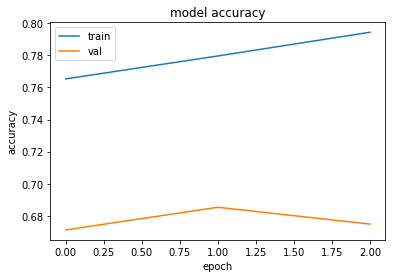

In [27]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.savefig('visual9-12acc.png')
plt.show()


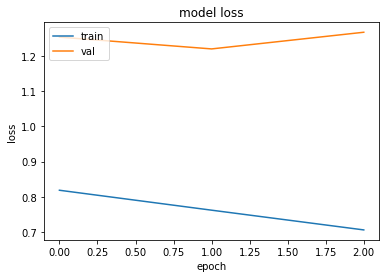

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.savefig('visual9-12loss.png')
plt.show()


In [29]:
from keras.models import load_model
model=load_model('video_weights/weights-improvement-08-0.68.hdf5')

In [30]:
#model.load_weights('weights-improvement-04-0.98.hdf5')
model.evaluate_generator(video.generate_array(testlist,batch_size=48),
                         steps=len(testlist)//48)

[1.2596036778046535, 0.6676282056249105]

In [20]:
model1 = Model(inputs=[input1], 
              outputs=[dense2])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 29, 120, 120, 3)   0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 29, 60, 60, 64)    47104     
_________________________________________________________________
batch_normalization_1 (Batch (None, 29, 60, 60, 64)    256       
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 29, 30, 30, 64)    0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 29, 28, 28, 128)   73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 28, 28, 128)   512       
_________________________________________________________________
time_distributed_2 (TimeDist (None, 29, 14, 14, 128)   0         
__________

In [21]:
print("[INFO] compiling model...")
# model = SmallerVGGNet.build(width=IMAGE_DIMS[1], height=IMAGE_DIMS[0],
# 	depth=IMAGE_DIMS[2], classes=6)
#opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9)
model1.compile(loss="categorical_crossentropy", optimizer=sgd,
	metrics=["accuracy"])

[INFO] compiling model...


In [22]:
print("[INFO] training network...")
sample_number = len(train_list)
val_number = len(val_list)
#print(sample_number)
filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True,
mode='max')
stopper = EarlyStopping(monitor='acc',patience=3)
callbacks_list = [checkpoint,stopper]

model1.fit_generator(generate_arrays_from_file(train_list,batch_size=32),
                        validation_data=(valX,val_Y),
                        steps_per_epoch=sample_number // 32,
                        epochs=10, verbose=1,
                   callbacks = callbacks_list)

[INFO] training network...


ValueError: Error when checking input: expected input_1 to have 5 dimensions, but got array with shape (900, 120, 120, 29)